# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)

Please see rna63_project_part2.ipynb for the complete overview of the team and project.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random

In [2]:
sns.set(style="darkgrid")

In [3]:
from IPython.display import display, HTML

In [4]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [5]:
!pip install ipywidgets
# this no longer works
# !jupyter nbextension enable --py widgetsnbextension --user

In [6]:
# Set this to False to run full version.
sampled = True

In [7]:
if sampled:
    dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
else:  # Full dataset
    dataset_path = "craigslist_full_cleaned_2023_03_12_10_45_22.csv"

target_col = 'price'

In [8]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,34590.0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,16590.0,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,7800.0,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,27995.0,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,500.0,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


In [9]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.000000,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.000000,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.000000,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.000000,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.000000,clean,other,4wd,full-size,bus,green,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,2018.0,ford,ecosport titanium awd,good,4 cylinders,gas,38450.000000,salvage,automatic,fwd,full-size,SUV,black,wy
4030,2002.0,ford,f 350,good,6 cylinders,diesel,284097.166778,clean,manual,4wd,full-size,sedan,white,wy
4031,2012.0,mazda,mx-5 miata grand touring,good,6 cylinders,gas,29993.000000,clean,other,rwd,full-size,other,silver,wy
4032,2005.0,honda,civic,good,6 cylinders,gas,236787.000000,clean,automatic,4wd,full-size,coupe,white,wy


y

0       34590.0
1       16590.0
2        7800.0
3       27995.0
4         500.0
         ...   
4029     8550.0
4030     6500.0
4031    19990.0
4032     4277.0
4033     7477.0
Name: price, Length: 4034, dtype: float64

In [10]:
from sklearn import preprocessing

In [11]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [12]:
# uncomment and run this if needed.
!pip install category_encoders

In [13]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

In [14]:
# Convert categorical columns to Pandas category type

cats = X_all.select_dtypes(exclude=np.number).columns.tolist()
print("cats:")
display(cats)
for col in cats:
    X_all[col] = X_all[col].astype('category')

display(X_all.dtypes)
display(X_all.head())

cats:


['make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

year             float64
make            category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


## Data Dictionary

These are the columns we used from the Craigslist dataset.

|     Name     |  dtype   | Description | Null % | Notes |
|--------------|----------|--------------|--------------|--------------|
| price | float64 | Listed sale price | 0.0 |  | 
| year | float64 | Year of manufacture | 0.002823 | n/a |
| make | category | Auto manufacturer name | 0.041337 | Renamed from manufacturer |
| model | category | Car model name | 0.012362 | n/a |
| condition | category | Listed condition of vehicle | 0.407852 | n/a |
| cylinders | category | Number of engine cylinders | 0.416225 | n/a |
| fuel | category | Type of fuel used by vehicle (i.e. gas, deisel, electric) | 0.007058 | n/a |
| odometer | float64 | Odometer mileage of vehicle | 0.010307 | n/a |
| title_status | category | Status of vehicle title (i.e. clean, salvage) | 0.019308 | n/a |
| transmission | category | Type of vehicle transmission (i.e. automatic, manual) | 0.005988 | n/a |
| drive | category | Drive type of vehicle (i.e. fwd, 4wd) | 0.305863 | n/a |
| size | category | Size of vehicle(i.e. full-size) | 0.717675 | n/a |
| type | category | Vehicle type, (i.e. sedan,pickup) | 0.217527 | n/a |
| paint_color | category | Exterior paint color of vehicle | 0.305011 | n/a |
| state | category | State of vehicle location(i.e. WA, PI) | 0.000000 | n/a |

### Unused Columns

These columns we dropped after EDA before cleaning the data set.


    'id', 'url', 'region', 'VIN', 'region_url', 'county', 'lat', 'long', 'description', 'image_url', 'posting_date'
    
    
We dropped id, url, VIN, image_url because they are likely unique to each listing and uninformative.

We dropped posting_date because the dataset only has data from a limited time frame so this field is not likely to have a long enough date range to determine things like seasonality.


We dropped the columns region, region_url, county, lat, and long so that we could just use state as a single more easily usable column for the effect of the vehicle location on price.



In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)

In [16]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [17]:
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [18]:
# This command will try to get an up to date version.
#!pip install --user --upgrade xgboost
#!pip install --user xgboost

In [19]:
import xgboost as xgb

In [20]:
# on the Mac GPUs (at least on my M2 macbook air), the CUDA libraries that XGBoost uses do not support the GPU.
# This means we are stuck with CPU for XGBoost or run it on something else.
import platform
platform.processor()
plat = platform.system()
print("Platform: ", plat)

Platform:  Linux


In [21]:
# hyperparameters for XGBoost and notes from experimenting with them.

# If you have GPU support, enable with this.
# params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {}
params['objective'] = "reg:squarederror"

#params['learning_rate'] = .1 # learning_rate
# was still improving after 5000 rounds with .1 learning rate
# RMSE of train data:  3148.6374127464414
# RMSE of test data:  5077.025190920731
# R2 Score of test data: 0.872617141105975

# params['learning_rate'] = .2
# still only improvement after 5000 rounds and .2 lr
# RMSE of train data:  2263.7331220326378
# RMSE of test data:  4964.672293997728
# R2 Score of test data: 0.8781926403808091
# Saving model to model_xgboost_2023_03_13_11_48_48.pkl
# Saving model to model_preprocessor_f_2023_03_13_11_48_48.pkl

# params['learning_rate'] = .5
# RMSE of train data:  1243.8832871951065
# RMSE of test data:  5133.313632049499
# R2 Score of test data: 0.8697769227457282
# Saving model to model_xgboost_2023_03_13_12_47_46.pkl

params['learning_rate'] = .3
# the one for the feature importance has ~ 4400 RMSE on test set.
# best so far.
# RMSE of train data:  1771.4766651398668
# RMSE of test data:  4944.281393534352
# R2 Score of test data: 0.8791911598987936
# Saving model to model_preprocessor_f_2023_03_13_14_22_04.pkl
# Saving model to model_xgboost_2023_03_13_16_35_43.pkl


In [22]:
# Setup pipelines for comparison

linear_pipeline = Pipeline(steps=[
                                  ('pre_processing',pre_process),
                                  ('reg', LinearRegression())
                                 ])

ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 
                                 ('reg', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])

# NOTE: Add tree_method="gpu_hist" here as well if supported and desired.
xgb_reg = xgb.XGBRegressor(objective=params['objective'], learning_rate=params['learning_rate'])

xgb_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', xgb_reg)
                                 ])

pipelines = {
    'linear':linear_pipeline,
    'ridge': ridge_pipeline,
    'lasso': lasso_pipeline,
    'random_forest': rf_pipeline,
    'xgboost': xgb_pipeline
}


In [23]:
from sklearn.model_selection import cross_validate

In [24]:
def cross_validate_pipeline(label, pipeline):    
    scoring = "neg_mean_squared_error"
    n_cv_folds = 3

    print("cross validate for:", label)
    result = cross_validate(pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
    display(result)

    return result

In [25]:
def plot_residuals(predict_train, predict_test):

    plt.scatter(
        predict_train,
        predict_train - y_train,
        c='blue',
        marker='o',
        label='Training data')

    plt.scatter(
        predict_test,
        predict_test - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
    
    plt.tight_layout()
    plt.show()

In [26]:
def show_samples(X_vals, y_vals, predictions):
    samples = X_vals.copy()
    samples[target_col] = y_vals
    samples['predicted_price'] = predictions
    display(samples)


In [27]:
from sklearn.metrics import r2_score

def score_pipeline(pipeline):
    predict_train = pipeline.predict(X_train)
    predict_test = pipeline.predict(X_test)
    
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    # r2 == https://en.wikipedia.org/wiki/Coefficient_of_determination
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)  # r2 anyway
    print("R2 score", r2)
    
    scores = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'score': score,
        'r2_score': r2, 
    }
    results = {
        'scores':scores,
        'predict_train': predict_train,
        'predict_test': predict_test
    }
    print("scores:", scores)
    return results

In [28]:
import joblib
from datetime import datetime

def save_model(model_name, model, use_ts=True):
    if use_ts:
        rn = datetime.now()
        dts = '_' + rn.strftime("%Y_%m_%d_%H_%M_%S")
    else:
        dts = ''

    dest_path = f"model_{model_name}{dts}.pkl"
    print(f"Saving model to {dest_path}")
    joblib.dump(model, dest_path)
    
    return dest_path

def load_model(model_path):
    print(f"Loading model from {model_path}")
    model = joblib.load(model_path)
    return model

In [29]:
def eval_pipeline(label, pipeline):
    cross_validate_pipeline(label, pipeline)
    
    rmod = pipeline.fit(X_train,y_train)
    display(rmod)
    
    results = score_pipeline(pipeline)
     
    show_samples(X_test, y_test, results['predict_test'])
    plot_residuals(results['predict_train'], results['predict_test'])
    
    return rmod, results

Evaluating linear

cross validate for: linear


{'fit_time': array([0.04304004, 0.03618646, 0.04110098]),
 'score_time': array([0.00425434, 0.00406098, 0.00410199]),
 'test_score': array([-1.07874852e+08, -9.33862391e+07, -1.22048785e+08])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', LinearRegression())])

RMSE of train data:  5169.910602926243
RMSE of test data:  10082.68378555109
model score: 0.460
R2 score 0.46010915583201173
scores: {'train_rmse': np.float64(5169.910602926243), 'test_rmse': np.float64(10082.68378555109), 'score': 0.46010915583201173, 'r2_score': 0.46010915583201173}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,33658.523343
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,22350.024106
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,13975.733096
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,4460.808446
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-6210.980114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,25430.228584
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,22566.887114
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,31693.730828
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,1740.274315


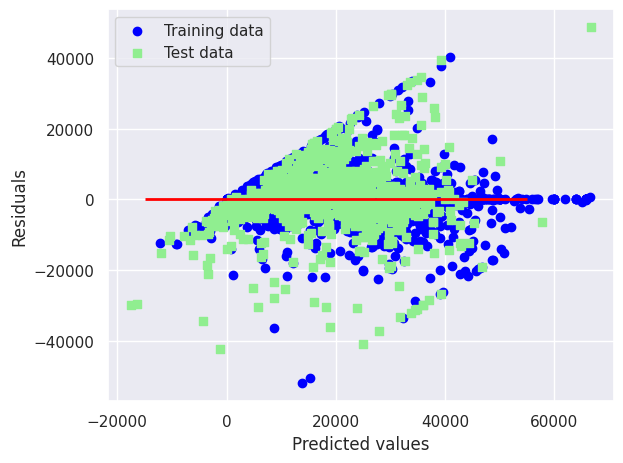

Evaluating ridge

cross validate for: ridge


{'fit_time': array([0.11632299, 0.06426644, 0.05962396]),
 'score_time': array([0.00432801, 0.00412893, 0.00397444]),
 'test_score': array([-85670188.01575522, -72691817.97228983, -97923326.63085414])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor())])

RMSE of train data:  7436.634257597185
RMSE of test data:  8868.835477788918
model score: 0.582
R2 score 0.5822784646777859
scores: {'train_rmse': np.float64(7436.634257597185), 'test_rmse': np.float64(8868.835477788918), 'score': 0.5822784646777859, 'r2_score': 0.5822784646777859}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,29707.027287
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,20715.476368
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,29515.762304
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,6058.010225
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-3456.182938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,27582.969380
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,18463.289573
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,34276.930819
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,6093.895989


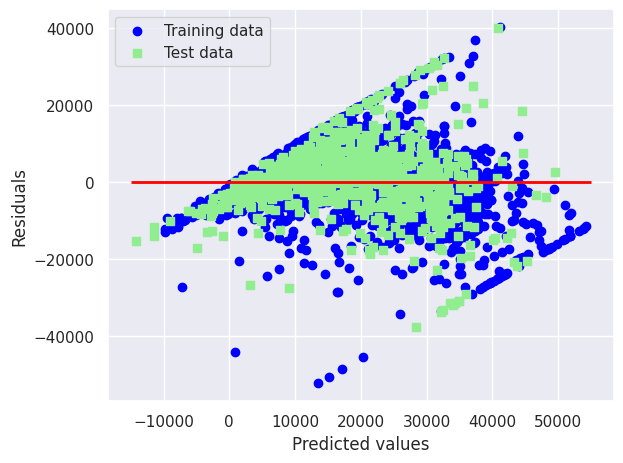

Evaluating lasso

cross validate for: lasso


/home/ranton/projects/used_car_sale_price_analysis/.venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'fit_time': array([0.11276293, 0.17648149, 0.20955181]),
 'score_time': array([0.00460601, 0.00451946, 0.00442648]),
 'test_score': array([-86053657.35767859, -72572164.65285467, -98756535.9033984 ])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor(penalty='l1'))])

RMSE of train data:  7585.730086107795
RMSE of test data:  8864.069477685673
model score: 0.583
R2 score 0.5827273005940048
scores: {'train_rmse': np.float64(7585.730086107795), 'test_rmse': np.float64(8864.069477685673), 'score': 0.5827273005940048, 'r2_score': 0.5827273005940048}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,29432.914799
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,20547.571069
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,29678.711532
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,5876.192630
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-3799.998018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,27576.597958
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,18141.556939
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,34219.384979
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,5842.087871


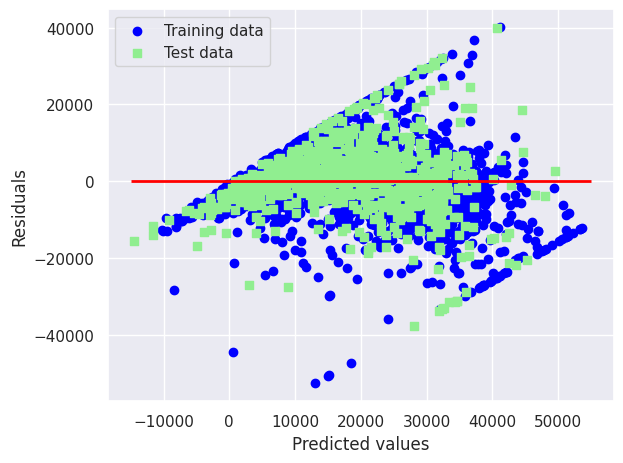

Evaluating random_forest

cross validate for: random_forest


{'fit_time': array([1.1035006 , 1.10308146, 1.14390898]),
 'score_time': array([0.01082253, 0.01157093, 0.01064396]),
 'test_score': array([-80603967.1420392 , -61780645.7834055 , -85225574.79710737])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=10, random_state=191))])

RMSE of train data:  6029.671987038686
RMSE of test data:  8549.260491664412
model score: 0.612
R2 score 0.6118400095464092
scores: {'train_rmse': np.float64(6029.671987038686), 'test_rmse': np.float64(8549.260491664412), 'score': 0.6118400095464092, 'r2_score': 0.6118400095464092}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,24188.199820
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,18588.487377
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,21608.892615
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,9841.511546
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,4515.481371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,21866.118052
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,11451.092592
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,31322.339802
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,5139.256694


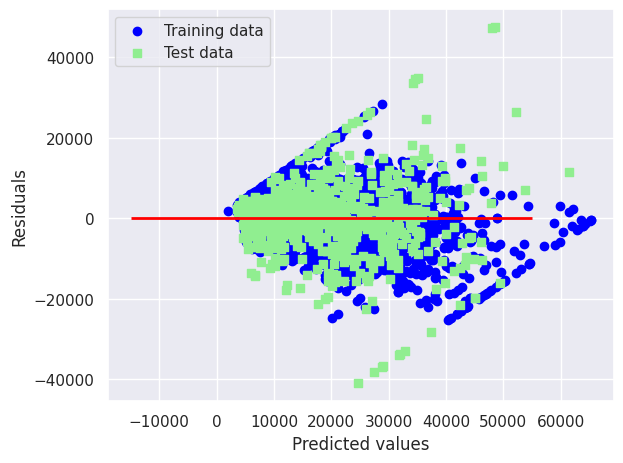

Evaluating xgboost

cross validate for: xgboost


{'fit_time': array([0.14399147, 0.0783639 , 0.07438779]),
 'score_time': array([0.00978231, 0.01122427, 0.00687122]),
 'test_score': array([-76190077.04395281, -56715067.75960731, -80779996.1063784 ])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'],...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

RMSE of train data:  4844.878857153749
RMSE of test data:  8137.533164800482
model score: 0.648
R2 score 0.6483268499239019
scores: {'train_rmse': np.float64(4844.878857153749), 'test_rmse': np.float64(8137.533164800482), 'score': 0.6483268499239019, 'r2_score': 0.6483268499239019}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,28176.037109
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,18504.240234
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,21813.095703
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,9163.339844
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,3871.649414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,29078.980469
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,12376.581055
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,32939.652344
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,6238.399902


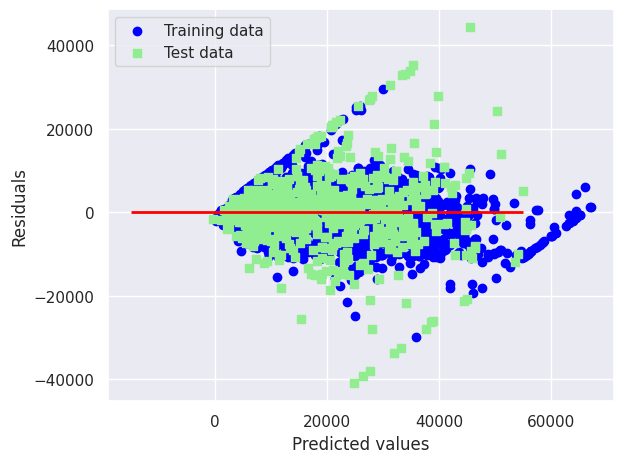

In [30]:
all_results = []
for label, pipeline in pipelines.items():
    show_heading(f"Evaluating {label}", 2)
    rmod, results = eval_pipeline(label, pipeline)
    scores = {'label': label}
    scores.update(results['scores'])
    all_results.append(scores)

In [31]:
df = pd.DataFrame.from_dict(all_results)

show_heading("Pipeline Score Summary")
display(df)

Pipeline Score Summary

,label,train_rmse,test_rmse,score,r2_score
0,linear,5169.910603,10082.683786,0.460109,0.460109
1,ridge,7436.634258,8868.835478,0.582278,0.582278
2,lasso,7585.730086,8864.069478,0.582727,0.582727
3,random_forest,6029.671987,8549.260492,0.611840,0.611840
4,xgboost,4844.878857,8137.533165,0.648327,0.648327


In [32]:
def plot_evals_result(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    x = None
    
    lines = {}
    for key, values in results.items():
        print("key:", key)
        if x is None:
            n_rounds = len(values)
            x = np.linspace(0, n_rounds, n_rounds)
            
        lines[key],  = ax.plot(x, values, label=key)
        ax.legend()

    plt.show()
    

In [33]:
# Callback for xgboost to save error metrics by epoch.
class EvalCapture(xgb.callback.TrainingCallback):
    
    def __init__(self, rounds):
        self.rounds = rounds
        self.lines = {}
        self.x = np.linspace(0, self.rounds, self.rounds)
        self.evals_log = None
        
    def _get_key(self, data, metric):
        return f'{data}-{metric}'

    def evals_result(self):
        # return results as dict of array of values for each round.
        results = {}
        
        for data, metric in self.evals_log.items():
            for metric_name, log in metric.items():
                key = self._get_key(data, metric_name)
                results[key] = log
        return results
         
    def after_iteration(self, model, epoch, evals_log):
        # Keep most recent log
        self.evals_log = evals_log
        return False

In [34]:
def xgboost_fit(X_train, y_train, X_test, y_test, enable_cat, n_rounds = 5000):
    # This is the non pipeline version for helping with measuring feature importance.

    # Convert to the format XGBoost lib expects.
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=enable_cat)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=enable_cat)

    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    evals_capture = EvalCapture(n_rounds)
    
    model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n_rounds,
      evals=evals,
      verbose_eval=50, # print every N rounds
      early_stopping_rounds=10,  # stop if no improvement to validation loss in N rounds.
      callbacks=[evals_capture]
    )

    evals_result = evals_capture.evals_result()
    plot_evals_result(evals_result)
    
    predict_test = model.predict(dtest_reg)
    predict_train = model.predict(dtrain_reg)
    
    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
        
    return model


[0]	validation-rmse:12038.02236	train-rmse:10826.09681
[50]	validation-rmse:9388.13833	train-rmse:735.80371
[100]	validation-rmse:9377.11255	train-rmse:229.27245
[150]	validation-rmse:9375.73768	train-rmse:85.37087
[200]	validation-rmse:9374.72529	train-rmse:23.45453
[250]	validation-rmse:9374.40303	train-rmse:7.64518
[300]	validation-rmse:9374.27514	train-rmse:2.95121
[350]	validation-rmse:9374.27266	train-rmse:1.97567
[400]	validation-rmse:9374.26005	train-rmse:1.87756
[450]	validation-rmse:9374.25720	train-rmse:1.86813
[500]	validation-rmse:9374.25787	train-rmse:1.86724
[550]	validation-rmse:9374.25767	train-rmse:1.86715
[600]	validation-rmse:9374.25775	train-rmse:1.86715
[629]	validation-rmse:9374.25773	train-rmse:1.86715
key: validation-rmse
key: train-rmse


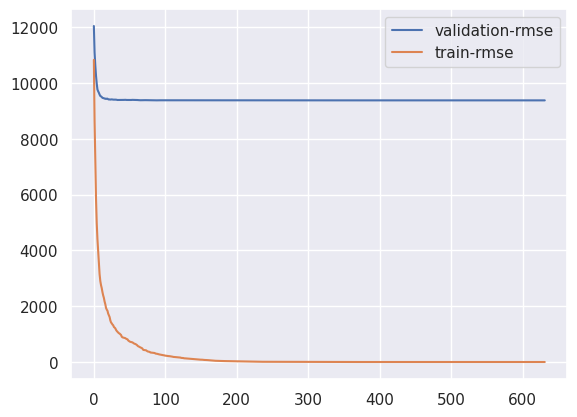

RMSE of train data:  1.8671473295082686
RMSE of test data:  9374.257821714391
R2 Score of test data: 0.5333111165338645


In [35]:
# Train a separate model to do feature importance
model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=True) 


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

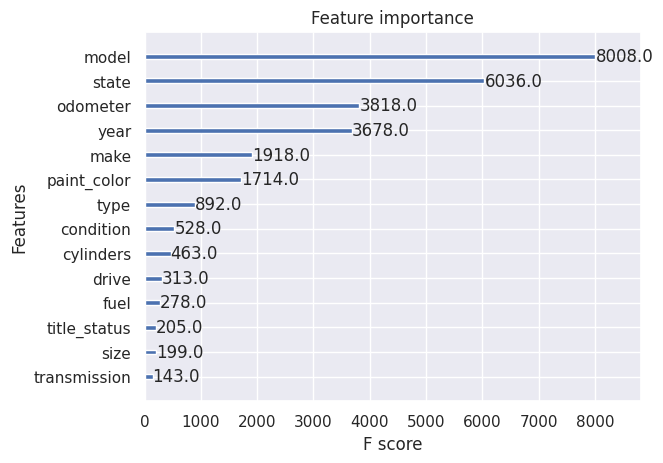

In [36]:
n_features_max = 50

from xgboost import plot_importance
plot_importance(model, max_num_features=20)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
    
n_pca_comp = 10

# Using LeaveOneOut and PCA
cat_encoder = Pipeline([
    ('LOO', ce.LeaveOneOutEncoder(return_df=False)),
    ('PCA', PCA(n_components = n_pca_comp,random_state=193))
])

alt_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])

In [38]:
def train_random_forest(xreg_train, yreg_train, xreg_test, yreg_test):


    RF_regressor = Pipeline([('pre_processing',alt_pre_process),
                             ('reg', RandomForestRegressor(max_depth=15,random_state=191))])

    RF_regressor.fit(xreg_train, yreg_train)

    predict_train = RF_regressor.predict(xreg_train)
    predict_test = RF_regressor.predict(xreg_test)

    train_rmse = mean_squared_error(yreg_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(yreg_test, predict_test)**(0.5)
  
    score = RF_regressor.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    
    return RF_regressor


In [39]:
print("Random Forest")
train_random_forest(X_train, y_train, X_test, y_test)    


Random Forest
RMSE of train data:  4614.710210748627
RMSE of test data:  8040.117451911296
model score: 0.657
R2 score 0.6566963233232344


Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoder',
                                                  Pipeline(steps=[('LOO',
                                                                   LeaveOneOutEncoder(return_df=False)),
                                                                  ('PCA',
                                                                   PCA(n_components=10,
                                                                       random_state=193))]),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=15, random_state=191))])

In [40]:
def score_xgb_model(X_train, y_train, X_test, y_test):
    n_rounds = 5000    
    xgb_model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=False, n_rounds=n_rounds) 
    return xgb_model

In [41]:
print("XGBoost")

alt_pre_process.fit(X_train, y_train)

# save the fitted preprocessor 
save_model("preprocessor_f", alt_pre_process, use_ts=True)

XGBoost
Saving model to model_preprocessor_f_2024_12_22_16_53_29.pkl


'model_preprocessor_f_2024_12_22_16_53_29.pkl'

[0]	validation-rmse:11420.59629	train-rmse:11185.50335
[50]	validation-rmse:8388.18693	train-rmse:2984.43503
[100]	validation-rmse:8442.05824	train-rmse:1557.98409
[150]	validation-rmse:8476.88593	train-rmse:871.32199
[200]	validation-rmse:8472.88404	train-rmse:547.91530
[250]	validation-rmse:8484.92035	train-rmse:349.45420
[300]	validation-rmse:8488.45052	train-rmse:215.24364
[350]	validation-rmse:8492.91911	train-rmse:127.28488
[400]	validation-rmse:8493.21216	train-rmse:81.30653
[450]	validation-rmse:8494.39961	train-rmse:52.86054
[500]	validation-rmse:8495.43289	train-rmse:34.38376
[550]	validation-rmse:8494.93207	train-rmse:21.31696
[600]	validation-rmse:8495.21479	train-rmse:13.79664
[650]	validation-rmse:8495.37472	train-rmse:9.01780
[700]	validation-rmse:8495.31508	train-rmse:6.00561
[750]	validation-rmse:8495.24832	train-rmse:4.08693
[800]	validation-rmse:8495.23046	train-rmse:2.96196
[850]	validation-rmse:8495.26037	train-rmse:2.40880
[900]	validation-rmse:8495.29387	train-rm

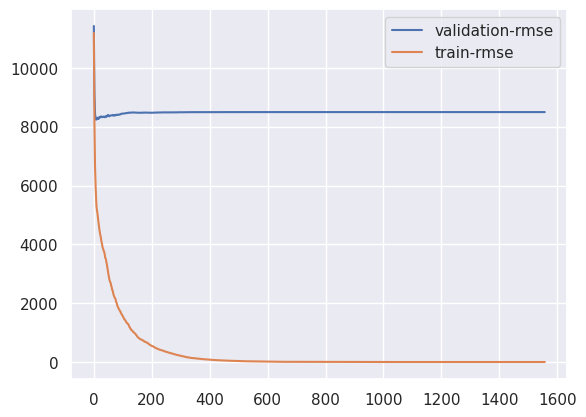

RMSE of train data:  1.867148685458816
RMSE of test data:  8495.290233422222
R2 Score of test data: 0.6167253374937831


In [42]:
X_pre_train =  alt_pre_process.transform(X_train)
X_pre_test =  alt_pre_process.transform(X_test)

xgb_model = score_xgb_model(X_pre_train, y_train, X_pre_test, y_test)

In [43]:
# save the model
save_model("xgboost", xgb_model, use_ts=True)

Saving model to model_xgboost_2024_12_22_16_53_30.pkl


'model_xgboost_2024_12_22_16_53_30.pkl'